# Project Case : Boston Housing Data

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

## Become familiar with the dataset 

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)


# Task 4: Generate Descriptive Statistics and Visualizations

# Question 1 : 

## For the "Median value of owner-occupied homes" provide a boxplot

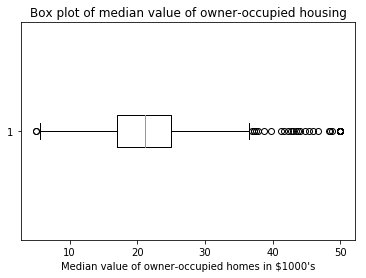

In [21]:
# Extract collumn MEDV
medv_values = boston_df['MEDV']

# Create boxplot
plt.boxplot(medv_values, vert=False)
plt.title('Box plot of median value of owner-occupied housing')
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('')

# show boxplot 
plt.show()

# Question 2 : 

## Provide a  bar plot for the Charles river variable

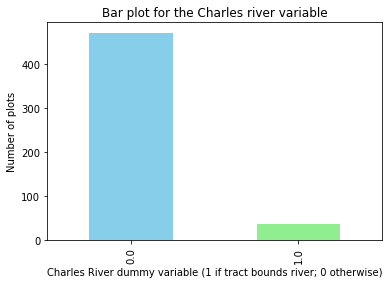

In [22]:
# Count occurrences of each value (0 or 1)
chas_counts = boston_df['CHAS'].value_counts()

# Create bar plot
chas_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Bar plot for the Charles river variable')
plt.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Number of plots')

# show bar plot
plt.show()

# Question 3 : 

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

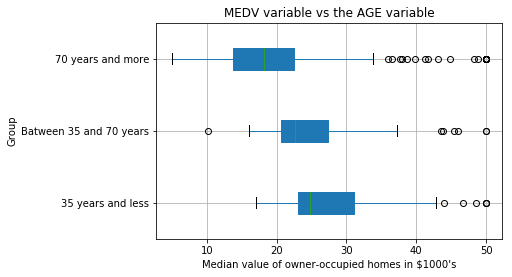

In [25]:
# AGE variable in three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and less', 'Batween 35 and 70 years', '70 years and more']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create boxplot by group age
plt.figure(figsize=(10, 6))
boxplot = boston_df.boxplot(column='MEDV', by='AGE_Group', vert=False, patch_artist=True)

# Graphic customization
plt.title('MEDV variable vs the AGE variable')
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Group')
plt.suptitle('')

# show boxplot
plt.show()

# Question 4 : 

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

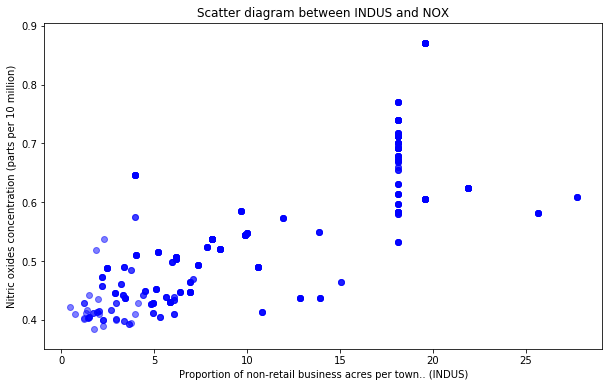

In [27]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.5, color='blue')
plt.title('Scatter diagram between INDUS and NOX')
plt.xlabel('Proportion of non-retail business acres per town.. (INDUS)')
plt.ylabel('Nitric oxides concentration (parts per 10 million)')

# show scatter plot
plt.show()

### What can you say about this relationship?

There's a strong relationship between low nitric oxide concentration and the low proportion of non-commercial surface area per city.

So, the more commercial land per city, the higher the nitric oxide concentration.

# Question 5 : 

## Create a histogram for the pupil to teacher ratio variable

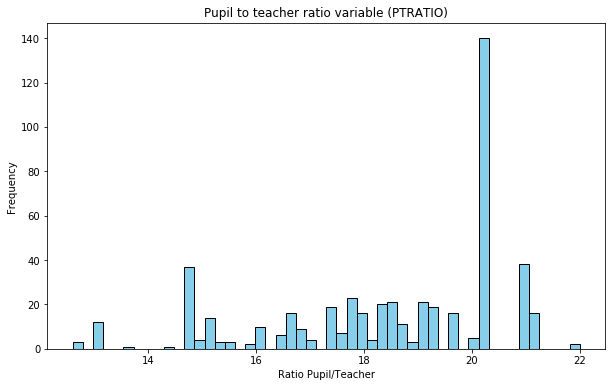

In [28]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=50,  color='skyblue', edgecolor='black')
plt.title('Pupil to teacher ratio variable (PTRATIO)')
plt.xlabel('Ratio Pupil/Teacher')
plt.ylabel('Frequency')

# show histogram
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided.


<b>For each of the following questions;</b>

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.


<b>Information : </b> <br>
p_value = probalibity (< or > to alpha)

f_stat = analysis of variance (ANOVA)<br>
    A high F value indicates a significant difference between groups.<br>
    A low F value suggests that the group means are not significantly different.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [29]:
from scipy.stats import ttest_ind

# Separating data into two groups
river_charles = boston_df[boston_df['CHAS'] == 1]['MEDV']
no_river_charles = boston_df[boston_df['CHAS'] == 0]['MEDV']

# T-test for independent samples
t_stat, p_value_t = ttest_ind(river_charles, no_river_charles, equal_var=False)

# show result
print("1. T-test for independent samples")
print("----------------------------------------------")
print("T-statistic:", t_stat)
print("P-value :", p_value_t)
print("\nInterpretation :")
if p_value_t < 0.05:
    print("The p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a significant difference in the median value of houses between those bordered by the Charles River and those that are not.")
else:
    print("The p-value is greater than 0.05, we do not reject the null hypothesis.")
    print("There is no significant difference in the median value of houses between the two groups.")


1. T-test for independent samples
----------------------------------------------
T-statistic: 3.11329131279
P-value : 0.00356717009814

Interpretation :
The p-value is less than 0.05, we reject the null hypothesis.
There is a significant difference in the median value of houses between those bordered by the Charles River and those that are not.


## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [32]:
from scipy.stats import f_oneway

# create group for ANOVA
grouped_data_age = [boston_df[boston_df['AGE_Group'] == group]['MEDV'] for group in boston_df['AGE_Group'].unique()]

# ANOVA
f_stat_age, p_value_age = f_oneway(*grouped_data_age)

# show result
print("ANOVA for the variable AGE_Group")
print("----------------------------------------------")
print("Statistic F :", f_stat_age)
print("P-value :", p_value_age)
print("\nInterpretation :")
if p_value_age < 0.05:
    print("The p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a significant difference in median house values between age groups.")
else:
    print("The p-value is greater than 0.05, we do not reject the null hypothesis.")
    print("There is no significant difference in median house values between age groups.")


ANOVA for the variable AGE_Group
----------------------------------------------
Statistic F : 36.407649992
P-value : 1.71050110227e-15

Interpretation :
The p-value is less than 0.05, we reject the null hypothesis.
There is a significant difference in median house values between age groups.


There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [34]:
from scipy.stats import pearsonr

# Pearson Correlation
corr, p_value_corr = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# show result
print("Pearson correlation between NOX and INDUS")
print("----------------------------------------------")
print("Correlation coefficient :", corr)
print("P-value :", p_value_corr)
print("\nInterpretation :")
if p_value_corr < 0.05:
    print("The p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a significant correlation between nitric oxide concentrations and the proportion of non-retail hectares per city.")
else:
    print("The p-value is greater than 0.05, we do not reject the null hypothesis.")
    print("There is no significant correlation between the two variables.")



Pearson correlation between NOX and INDUS
----------------------------------------------
Correlation coefficient : 0.763651446921
P-value : 7.91336106124e-98

Interpretation :
The p-value is less than 0.05, we reject the null hypothesis.
There is a significant correlation between nitric oxide concentrations and the proportion of non-retail hectares per city.


## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [35]:
from statsmodels.api import OLS, add_constant

X = boston_df['DIS']
y = boston_df['MEDV']
X = add_constant(X)

model = OLS(y, X).fit()
p_value = model.pvalues['DIS']

# show result
print("Regression analysis between DIS and MEDV")
print("----------------------------------------------")
print(model.summary())
print("\nInterpretation:")
if model.pvalues['DIS'] < 0.05:
    print("The p-value for the variable DIS is less than 0.05, we reject the null hypothesis.")
    print("There is a significant impact of weighted distance on the median value of owner-occupied homes.")
else:
    print("The p-value for the DIS variable is greater than 0.05, we do not reject the null hypothesis.")
    print("There is no significant impact of weighted distance on the median value of owner-occupied homes.")


Regression analysis between DIS and MEDV
----------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        15:36:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------

The result suggests that, according to the regression analysis, for each additional unit increase in the weighted distance to the 5 employment centers in Boston (DIS), the median value of owner-occupied homes (MEDV) increases by approximately 1.0916 units.